In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Carrega os dados limpos
df_ml = pd.read_csv('tab_pronta.csv')

# 2. Se você quiser que o nome seja igual ao do vídeo para não se confundir:
tab_cruzada = df_ml 

# 3. Recriar a variável 'analise' (aquela do agrupamento por livros)
analise = tab_cruzada.groupby('Book-Title').agg(
    Quantidade=('Book-Title', 'count'),
    Media=('Book-Rating', 'mean')
)

print("Tudo pronto! Dados e variáveis de análise carregados.")

Tudo pronto! Dados e variáveis de análise carregados.


In [82]:
# Use 'df_ml' que é o nome que você deu ao carregar o 'tab_pronta.csv'
concentracao = (df_ml['Pais'].value_counts(normalize=True).cumsum() * 100).head(10)
concentracao.to_frame(name='Porcentagem Acumulada')

,Porcentagem Acumulada
Pais,
usa,74.968967
canada,84.309129
united kingdom,87.630612
germany,90.408255
australia,92.239932
spain,93.743196
france,94.811690
portugal,95.512705
new zealand,96.071708


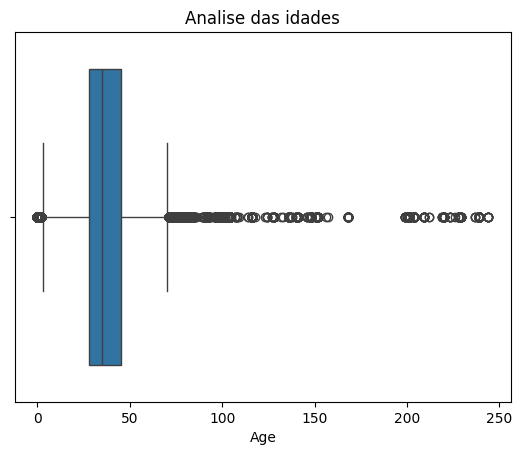

In [83]:
plt.title('Analise das idades')
# Note que usei 'Age' com 'A' maiúsculo, que é o padrão desse dataset
sns.boxplot(data=df_ml, x='Age')
plt.show()

In [84]:
#ajustar (avaliação)

Avaliacoes = analise.reset_index().iloc[:, 0:2]
tab_final = tab_cruzada.merge(Avaliacoes, how='inner', on='Book-Title')
tab_final.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Localizacao,Age,Pais,Quantidade
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0,usa,2
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN,canada,14
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0,"ottawa, ontario, canada",49.0,canada,14
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8,"n/a, n/a, n/a",NaN,NaN,14
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0,"sudbury, ontario, canada",NaN,canada,14


In [85]:
#filtrar livros 

livros_avaliados = tab_final.loc[tab_final['Quantidade'] >= 50]
livros_avaliados.shape

(288740, 14)

In [86]:
# 1. Filtrar apenas livros que têm, por exemplo, mais de 50 avaliações
# (Usando a variável 'analise' que criamos antes)
livros_populares = analise[analise['Quantidade'] >= 50].index

# 2. Criar um novo dataframe apenas com esses livros
df_reduzido = df_ml[df_ml['Book-Title'].isin(livros_populares)]

# 3. Agora sim, criar a pivot table com o dado reduzido
matriz_recomendacao = df_reduzido.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')

# 4. Preencher com zero e ver o novo tamanho
matriz_recomendacao.fillna(0, inplace=True)
print(f"Novo formato da matriz: {matriz_recomendacao}")

matriz_recomendacao.fillna(0, inplace=True)

#verificar

matriz_recomendacao.head

Novo formato da matriz: User-ID                                             8       9       14      \
Book-Title                                                                   
10 Lb. Penalty                                         0.0     0.0     0.0   
16 Lighthouse Road                                     0.0     0.0     0.0   
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2010: Odyssey Two                                      0.0     0.0     0.0   
...                                                    ...     ...     ...   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   
\Surely You're Joking, Mr. Feynman!\": Adventur...     0.0     0.0     0.0   
stardust                                

<bound method NDFrame.head of User-ID                                             8       9       14      \
Book-Title                                                                   
10 Lb. Penalty                                         0.0     0.0     0.0   
16 Lighthouse Road                                     0.0     0.0     0.0   
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2010: Odyssey Two                                      0.0     0.0     0.0   
...                                                    ...     ...     ...   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   
\Surely You're Joking, Mr. Feynman!\": Adventur...     0.0     0.0     0.0   
stardust                          

In [87]:
# Isso vai mostrar as notas de todos os livros para o usuário 254
print(matriz_recomendacao[254]) 

# Se quiser ver apenas onde ele deu nota (onde não é zero):
notas_usuario_254 = matriz_recomendacao[254]
print(notas_usuario_254[notas_usuario_254 > 0])

Book-Title
10 Lb. Penalty                                                               0.0
16 Lighthouse Road                                                           0.0
1984                                                                         9.0
1st to Die: A Novel                                                          0.0
2010: Odyssey Two                                                            0.0
                                                                            ... 
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values            0.0
Zoya                                                                         0.0
\O\" Is for Outlaw"                                                          0.0
\Surely You're Joking, Mr. Feynman!\": Adventures of a Curious Character"    0.0
stardust                                                                     0.0
Name: 254, Length: 2444, dtype: float64
Book-Title
1984                                           

In [88]:
from scipy.sparse import csr_matrix

# Transformando a matriz que o seu PC aguentou em esparsa
# CSR = Compressed Sparse Row (padrão para cálculos rápidos)
matriz_sparse = csr_matrix(matriz_recomendacao)

# Agora veja a mágica:
print(matriz_sparse)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 113910 stored elements and shape (2444, 47994)>
  Coords	Values
  (0, 8494)	5.0
  (0, 14336)	10.0
  (0, 19124)	8.0
  (0, 21599)	7.0
  (0, 22188)	4.5
  (0, 22230)	8.0
  (0, 23288)	8.0
  (0, 24174)	8.0
  (0, 27316)	8.0
  (0, 28096)	7.0
  (0, 30132)	5.0
  (0, 34167)	8.0
  (0, 34847)	8.0
  (0, 38744)	7.0
  (0, 38925)	6.0
  (0, 40366)	9.0
  (0, 40598)	7.0
  (0, 44139)	7.0
  (0, 45284)	6.0
  (1, 5052)	6.0
  (1, 12885)	8.0
  (1, 16858)	9.0
  (1, 16877)	8.0
  (1, 18498)	7.0
  (1, 21310)	5.0
  :	:
  (2443, 1813)	8.0
  (2443, 13240)	9.0
  (2443, 15356)	10.0
  (2443, 15612)	9.0
  (2443, 17265)	9.0
  (2443, 18652)	8.0
  (2443, 19721)	8.0
  (2443, 21458)	8.0
  (2443, 24317)	8.0
  (2443, 24398)	7.0
  (2443, 24618)	9.0
  (2443, 26361)	7.0
  (2443, 32030)	10.0
  (2443, 32373)	5.0
  (2443, 33572)	8.0
  (2443, 34381)	10.0
  (2443, 37032)	8.0
  (2443, 37493)	5.0
  (2443, 39619)	7.0
  (2443, 39838)	8.0
  (2443, 40253)	7.0
  (2443, 40679)	10.0
 

In [89]:
#exemplo da função
csr_matrix ( (4,4), dtype=np.int8 ).toarray()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)

In [114]:
from sklearn.neighbors import NearestNeighbors

# Criando o modelo de recomendação
modelo = NearestNeighbors(n_neighbors=6, metric='cosine', algorithm='brute')

# Treinando o modelo com a sua matriz compactada
modelo.fit(matriz_sparse)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",6
,"radius radius: float, default=1.0Range of parameter space to use by default for :meth:`radius_neighbors`queries.",1.0
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'brute'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'cosine'
,"p p: float (positive), default=2Parameter for the Minkowski metric fromsklearn.metrics.pairwise.pairwise_distances. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


In [115]:

for posicao, book_title in enumerate(matriz_recomendacao.index):
  
    if posicao < 10: 
        print(f"Posição: {posicao} | Livro: {book_title}")

Posição: 0 | Livro: 10 Lb. Penalty
Posição: 1 | Livro: 16 Lighthouse Road
Posição: 2 | Livro: 1984
Posição: 3 | Livro: 1st to Die: A Novel
Posição: 4 | Livro: 2010: Odyssey Two
Posição: 5 | Livro: 204 Rosewood Lane
Posição: 6 | Livro: 2061: Odyssey Three
Posição: 7 | Livro: 24 Hours
Posição: 8 | Livro: 2nd Chance
Posição: 9 | Livro: 3rd Degree


In [116]:
# 1. Selecionamos a linha 213 da nossa matriz filtrada
# Usamos .values para pegar apenas os números (as notas)
livro_selecionado = matriz_recomendacao.iloc[213, :].values.reshape(1, -1)

# 2. Agora, perguntamos ao modelo quais são os 6 vizinhos mais próximos
# (O primeiro vizinho será o próprio livro, por isso pedimos 6 para ver 5 novos)
distancias, sugestoes = modelo.kneighbors(livro_selecionado, n_neighbors=6)

# 3. Para saber qual é o nome do livro que você selecionou:
print(f"Livro selecionado: {matriz_recomendacao.index[213]}")


Livro selecionado: Bare Bones : A Novel


In [117]:
print("As recomendações são:")
for i in range(len(sugestoes)):
    # O modelo devolve uma lista dentro de outra, por isso usamos sugestoes[i]
    nomes_dos_livros = matriz_recomendacao.index[sugestoes[i]]
    print(nomes_dos_livros)

As recomendações são:
Index(['Bare Bones : A Novel', 'Naked Prey',
       'Grave Secrets (Temperance Brennan Novel (Hardcover))',
       'Blow Fly: A Scarpetta Novel', 'Smoke in Mirrors', 'Kentucky Rich'],
      dtype='str', name='Book-Title')


In [118]:
# Procurando o nome exato do livro na matriz
# Vamos buscar por 'Harry Potter' e ver quais títulos aparecem
display(matriz_recomendacao.index[matriz_recomendacao.index.str.contains('Harry Potter')])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Order of the Phoenix (Book 5)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Sorcerer's Stone (Book 1)',
       'Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))'],
      dtype='str', name='Book-Title')

In [119]:
# 1. Encontrar o número da linha (índice)
# Troque o nome abaixo pelo nome exato que apareceu no passo anterior
nome_do_livro = "Harry Potter and the Sorcerer's Stone (Book 1)"
indice_hp = matriz_recomendacao.index.get_loc(nome_do_livro)

# 2. Selecionar os dados desse livro e "achatar" para o modelo (reshape)
livro_para_recomendar = matriz_recomendacao.iloc[indice_hp, :].values.reshape(1, -1)

# 3. O modelo encontra os 6 mais próximos (o 1º é o próprio Harry Potter)
distancias, sugestoes = modelo.kneighbors(livro_para_recomendar, n_neighbors=6)

# 4. Mostrar os nomes dos livros indicados
print(f"Porque você leu: {nome_do_livro}\n")
print("Nossa máquina indica:")
for i in range(1, len(sugestoes.flatten())): # Começamos do 1 para pular o próprio HP
    print(f"{i}º: {matriz_recomendacao.index[sugestoes.flatten()[i]]}")

Porque você leu: Harry Potter and the Sorcerer's Stone (Book 1)

Nossa máquina indica:
1º: Harry Potter and the Chamber of Secrets (Book 2)
2º: Harry Potter and the Prisoner of Azkaban (Book 3)
3º: Harry Potter and the Goblet of Fire (Book 4)
4º: Harry Potter and the Order of the Phoenix (Book 5)
5º: The Hobbit: or There and Back Again


simulador

In [129]:
from IPython.display import Image, display

# Pega a URL do segundo livro da saga
url = df_ml.loc[df_ml['Book-Title'] == 'Harry Potter and the Chamber of Secrets (Book 2)', 'Image-URL-L'].values[0]

# Exibe a imagem grandona
display(Image(url=url))

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1. Criando a estrutura da figura com 1 linha e 5 colunas 
figura = make_subplots(rows=1, cols=5)

# 2. Loop para colocar cada capa
for i in range(1, 6): 
    nome_rec = matriz_recomendacao.index[sugestoes.flatten()[i]]
    url_rec = df_ml.loc[df_ml['Book-Title'] == nome_rec, 'Image-URL-L'].iloc[0]
    
    figura.add_layout_image(
        dict(
            source=url_rec,
            xref=f"x{i}" if i > 1 else "x",
            yref=f"y{i}" if i > 1 else "y",
            x=0.5, y=1,
            sizex=1.2, sizey=1.2, 
            xanchor="center", 
            yanchor="top",
            sizing="contain" # Isso força a imagem a caber no quadro sem sobrar muito branco
        ),
        row=1, col=i
    )
    
   # Removemos os eixos (números) para ficar limpo
    figura.update_xaxes(showgrid=False, zeroline=False, showticklabels=False, row=1, col=i)
    figura.update_yaxes(showgrid=False, zeroline=False, showticklabels=False, row=1, col=i)

# 3. Ajustando o Layout final

figura.update_layout(
    height=600, 
    width=1200, 
    title_text='<b>Livros Recomendados para Você</b>', # Negrito no título
    title_x=0.5, # Centraliza o título
    showlegend=False,
    plot_bgcolor='white' # Fundo limpo
)

# 4. Mostrando o resultado
figura.show()